# Refer to the questionnaire

In [36]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import f_oneway, kruskal
from scipy import stats

In [2]:
#Import dataset as a dataframe called SectionA
SectionA=pd.read_csv("Question 1.csv")
#view dataframe
SectionA

,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.0000,0.00,0.00,M2
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.3600,0.00,0.00,M3
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.0000,0.00,0.00,M3
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.6940,0.00,2490.00,21
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.0000,456.68,6257.70,16
...,...,...,...,...,...,...,...,...
10286,TBS,Department of Technology and Enterprise Busine...,TBS 34 OSP Low Code Governance and Administration,M,134500.0000,0.00,0.00,N28
10287,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Director,F,215032.1000,0.00,0.00,NaN
10288,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Office of Zoning and Administrative Hea...,F,84365.5529,0.00,0.00,N18
10289,ZAH,Office of Zoning and Administrative Hearings,ZAH 05 Zoning and Administrative Hearings,F,98228.0000,0.00,1596.27,N21


# 1. Using suitable visuals, run a “Gender Pay Gap Analysis” 

**A. Check dataframe for anomalies**

In [4]:
#Check information
SectionA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB


In [3]:
#check for missing data
SectionA.isnull().sum()

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64

In [5]:
#Check for duplicates
SectionA.duplicated().sum()

617

In [9]:
#Check for outliers
#Generate a function to count outliers
def count_outliers(SectionA, column_name):

  Q1 = cont_data[column_name].quantile(0.25)
  Q3 = cont_data[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 2.0 * IQR
  upper_bound = Q3 + 2.0 * IQR
  outliers = cont_data[(cont_data[column_name] < lower_bound) | (cont_data[column_name] > upper_bound)]
  return len(outliers)

# Count outliers in each variable
salary_outliers = count_outliers(cont_data, 'Base_Salary')
overtime_outliers = count_outliers(cont_data, 'Overtime_Pay')
longevity_outliers = count_outliers(cont_data, 'Longevity_Pay')

print("Number of Base salary outliers:", salary_outliers)
print("Number of Overtime Pay outliers:", overtime_outliers)
print("Number of Longevity Pay outliers:", longevity_outliers)

# Calculate the total number of outliers across all four columns
total_outliers = salary_outliers + overtime_outliers + longevity_outliers
print("Total number of outliers:", total_outliers)

#Calculate % of total outliers
percentage_outliers = (total_outliers/len(SectionA))*100
print("The percentage of total outliers:", percentage_outliers)

Number of Base salary outliers: 107
Number of Overtime Pay outliers: 954
Number of Longevity Pay outliers: 1765
Total number of outliers: 2826
The percentage of total outliers: 27.46088815469828


In [7]:
#Check for outliers
##Subset quantitative and qualitative variables
cont_data = SectionA.select_dtypes(include=['int64', 'float64'])
cat_data = SectionA.select_dtypes(include = "object")
print("continuous variables:", cont_data.columns)
print("categorical variables:", cat_data.columns)

continuous variables: Index(['Base_Salary', 'Overtime_Pay', 'Longevity_Pay'], dtype='object')
categorical variables: Index(['Department', 'Department_Name', 'Division', 'Gender', 'Grade'], dtype='object')


- The dataframe has 33 missing samples in the categorical variable Grade. These can be deleted or replaced with mode
- The dataframe has 617 duplicates. These can be deleted.
- The dataframe has 27.5% of the samples in the three continuous variables as outliers. These outliers could be interesting pieces of information, so we will transform a dataframe exclusing the outliers, and one including the outliers to see what differences it makes in the descriptive analytics

**B. Transform dataframe**

In [10]:
#Deleting duplicates
SectionA_clean1=SectionA.drop_duplicates()
#Check for duplicates
SectionA_clean1.duplicated().sum()

0

In [11]:
#Imputing for missing data using mode
SectionA_clean1['Grade']=SectionA_clean1['Grade'].fillna(SectionA_clean1['Grade'].mode()[0])
#Check the result for missing data
SectionA_clean1.isna().sum()


/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_5621/3238173104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SectionA_clean1['Grade']=SectionA_clean1['Grade'].fillna(SectionA_clean1['Grade'].mode()[0])


Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64

**C. Gender Pay Analysis Using a Total Salary**

In [15]:
# Create a new variable that combines all the salaries
SectionA_clean1['Total_Salary'] = SectionA_clean1['Base_Salary'] + SectionA_clean1['Overtime_Pay'] + SectionA_clean1['Longevity_Pay']
#Another variable that shows the average salary
SectionA_clean1['Average_Salary'] = SectionA_clean1['Total_Salary']/3

# Display the first few rows to verify the new feature
# print(data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay', 'Total_Salary']].head())
SectionA_clean1.head()

/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_5621/637826162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SectionA_clean1['Total_Salary'] = SectionA_clean1['Base_Salary'] + SectionA_clean1['Overtime_Pay'] + SectionA_clean1['Longevity_Pay']
/var/folders/fz/73x0k3yj55b9_g8mt4krpwr80000gn/T/ipykernel_5621/637826162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SectionA_clean1['Average_Salary'] = SectionA_clean1['Total_Salary']/3


,Department,Department_Name,Division,Gender,Base_Salary,Overtime_Pay,Longevity_Pay,Grade,Total_Salary,Average,Average_Salary
0,ABS,Alcohol Beverage Services,ABS 85 Administration,M,175873.000,0.00,0.0,M2,175873.000,100892.864258,58624.333333
1,ABS,Alcohol Beverage Services,ABS 85 Administration,M,145613.360,0.00,0.0,M3,145613.360,100892.864258,48537.786667
2,ABS,Alcohol Beverage Services,ABS 85 Administration,F,136970.000,0.00,0.0,M3,136970.000,100892.864258,45656.666667
3,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,89432.694,0.00,2490.0,21,91922.694,100892.864258,30640.898000
4,ABS,Alcohol Beverage Services,ABS 85 Administrative Services,F,78947.000,456.68,6257.7,16,85661.380,100892.864258,28553.793333


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

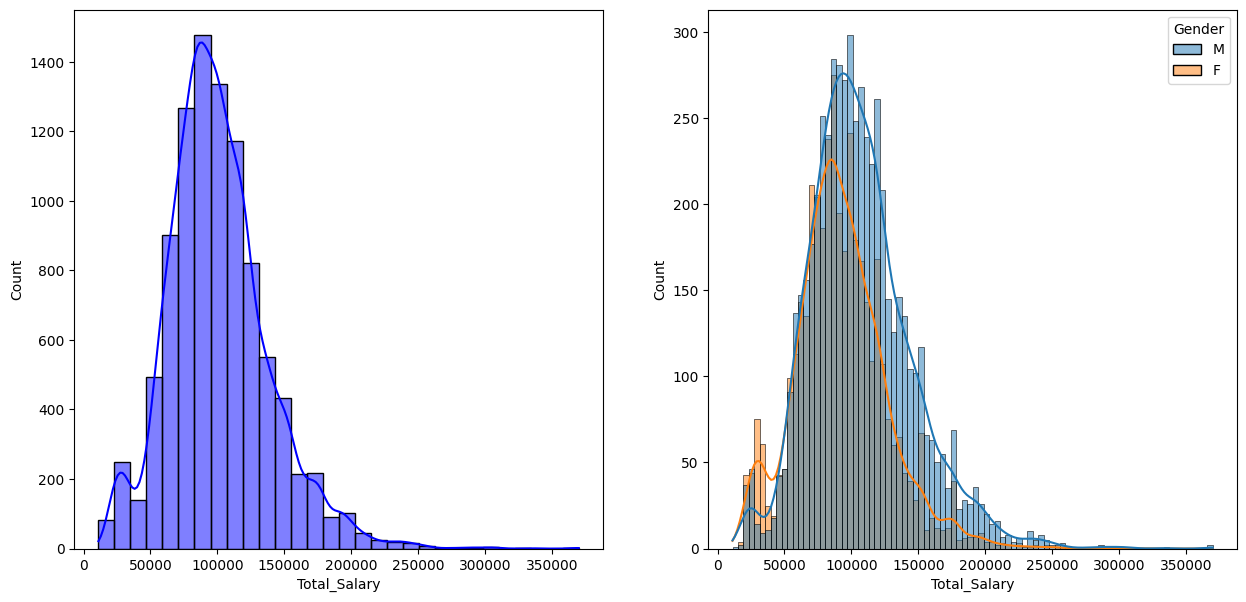

In [18]:
#Plot of total salary for both genders
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=SectionA_clean1, x='Total_Salary', bins=30, kde=True, color='b')
plt.subplot(122)
sns.histplot(data=SectionA_clean1, x='Total_Salary', kde=True, hue='Gender')
plt.show()

**D. Gender pay analysis by department**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

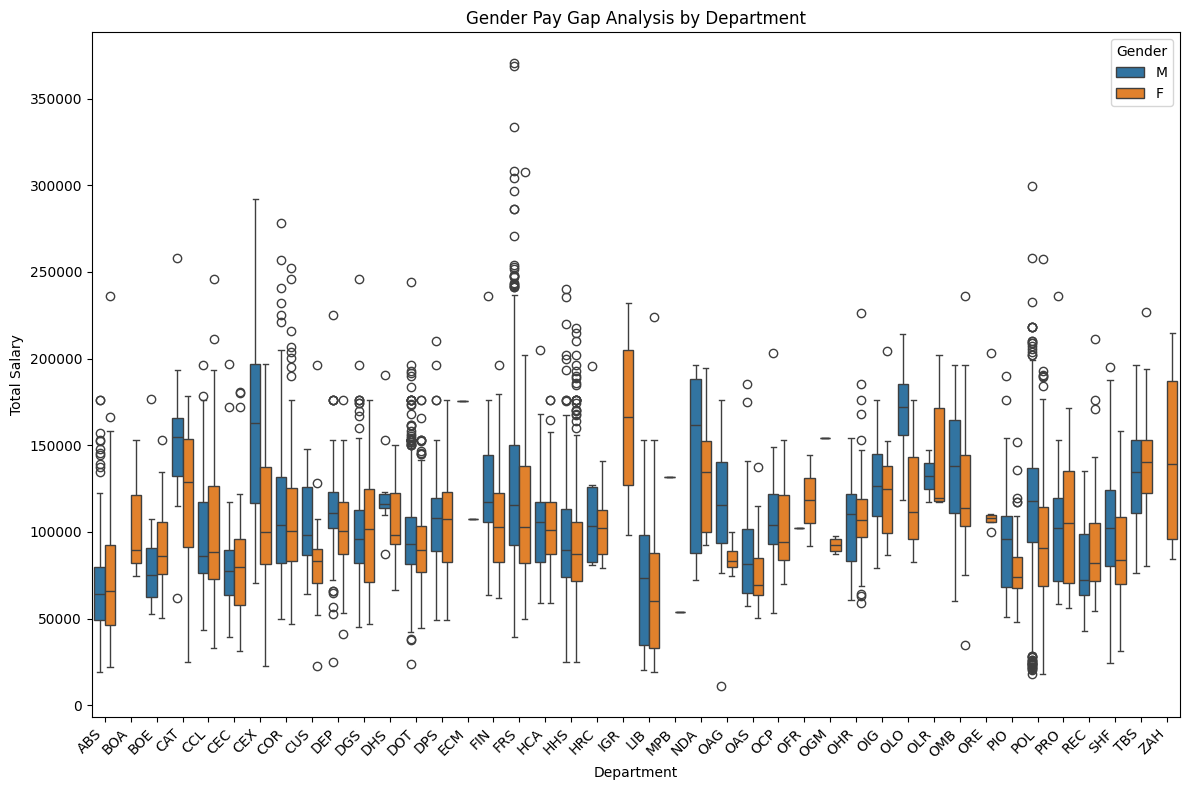

In [19]:
# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Department', y='Total_Salary', hue='Gender', data=SectionA_clean1)

# Customize plot
plt.title('Gender Pay Gap Analysis by Department')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
# Create separate box plots for each department
departments = SectionA_clean1['Department'].unique()

# Show plot
plt.tight_layout()
plt.show()

**E. Gender pay analysis by grade**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

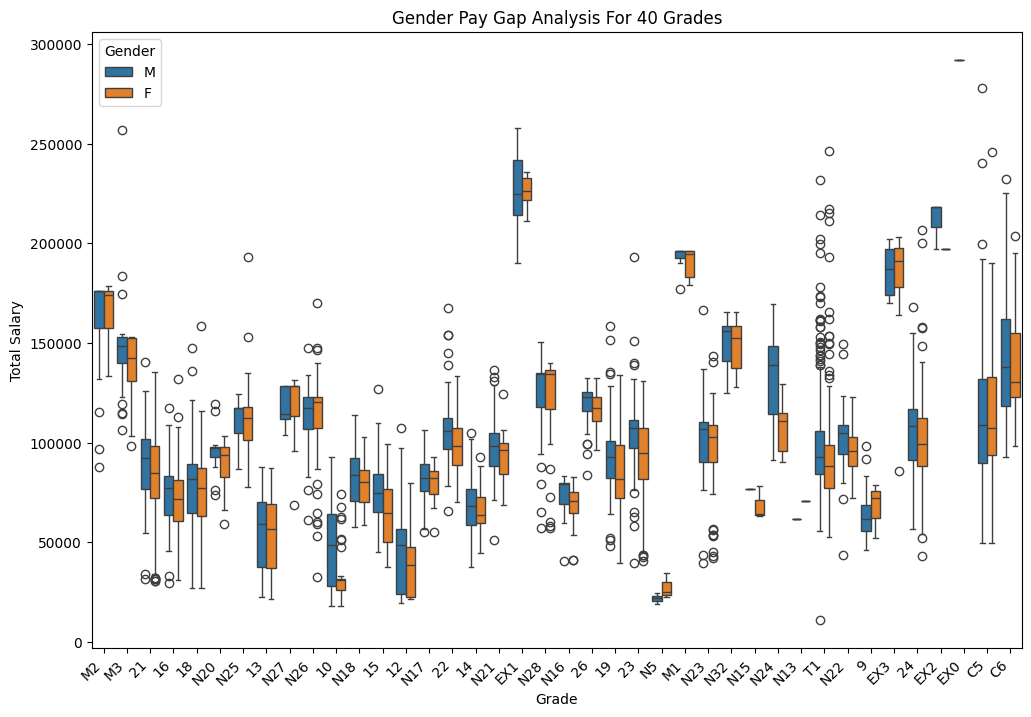

In [22]:
# Select 40 unique grades
selected_grades = SectionA_clean1['Grade'].unique()[:40]

# Filter the data to include only the selected grades
filtered_data = SectionA_clean1[SectionA_clean1['Grade'].isin(selected_grades)]

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Grade', y='Total_Salary', hue='Gender', data=filtered_data)

# Customize plot
plt.title('Gender Pay Gap Analysis For 40 Grades')
plt.xlabel('Grade')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

**F. Gender pay analysis across Divisions**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

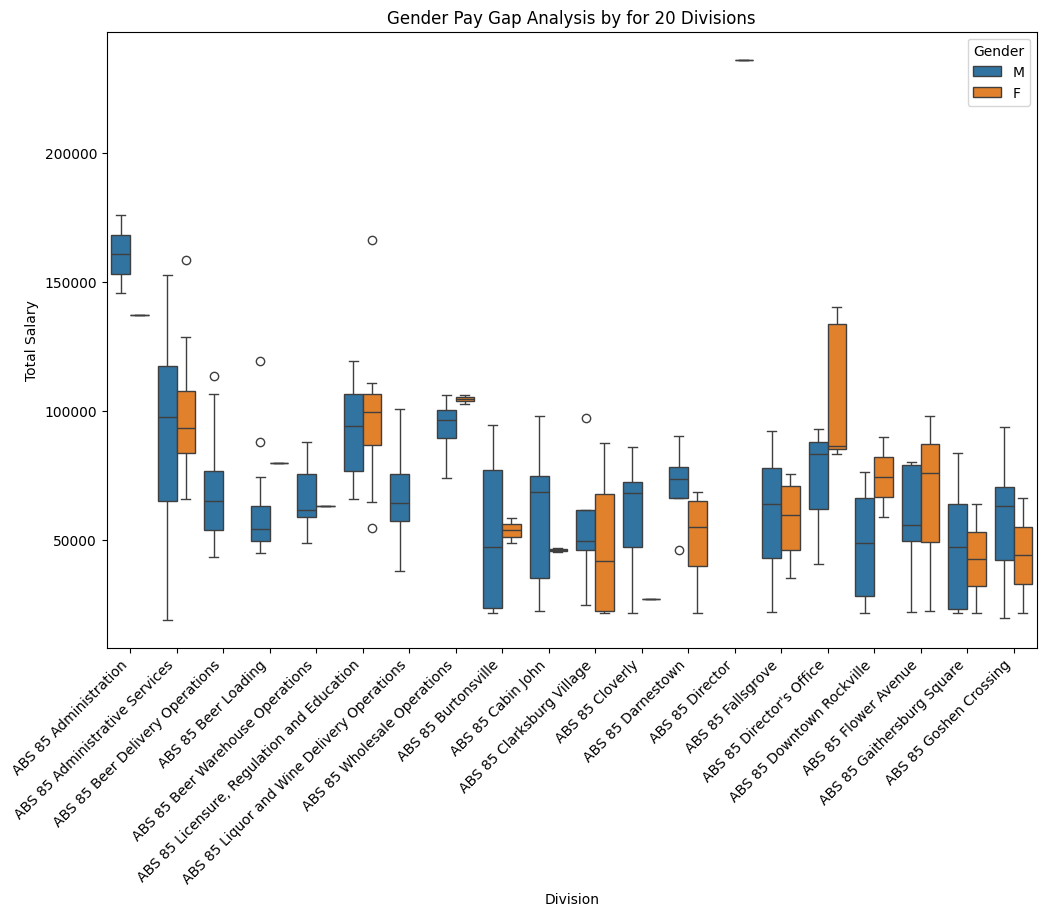

In [24]:
# Select 20 unique Divisions
selected_divisions = SectionA_clean1['Division'].unique()[:20]

# Filter the data to include only the selected grades
filtered_data = SectionA_clean1[SectionA_clean1['Division'].isin(selected_divisions)]

# Create the box plot
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Division', y='Total_Salary', hue='Gender', data=filtered_data)

# Customize plot
plt.title('Gender Pay Gap Analysis by for 20 Divisions')
plt.xlabel('Division')
plt.ylabel('Total Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framew

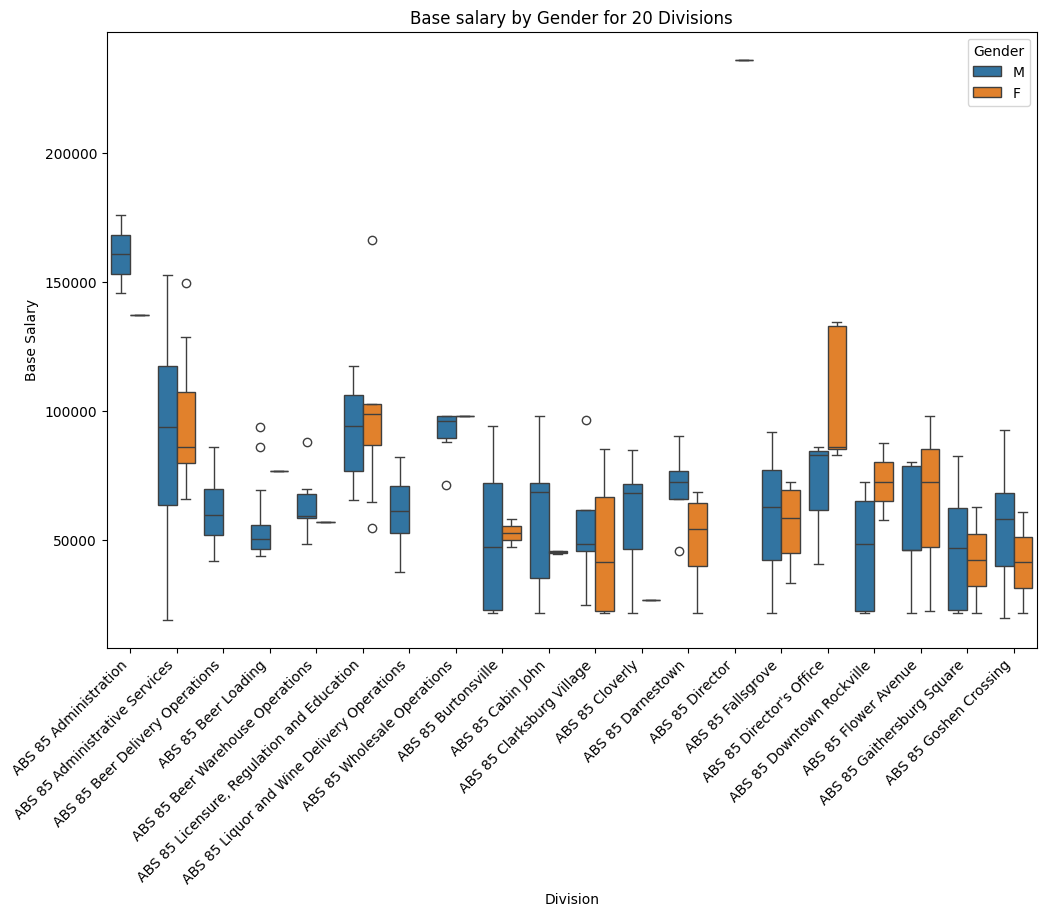

In [25]:
#Alternatively look at each salary type e.g. Base_Salary
# Create the box plot for 20 divisions
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.boxplot(x='Division', y='Base_Salary', hue='Gender', data=filtered_data)
# Customize plot
plt.title('Base salary by Gender for 20 Divisions')
plt.xlabel('Division')
plt.ylabel('Base Salary')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

      Results Explained:
- Overall, females receive a lower total salary than males. The total salary is a combination of the base, overtime and longevity pay.
- Across 40 grades within the working industry, females recieve a lower total salary than males with the exceptions of gradescN26, N5, N15, 9, EX3; where females get a higher total salary.
- Across a sampled 20 divisions in the working industry, the majority of the 20 divisions pay males a higher total salary than females. There are some divisions where the females get a negligible total salary compared to males such as ABD 85 Adminstration, Beer Delivery Operations, Beer Loading, Beer Warehouse Operations, indicating that either females are not employed in those divisions, or they are too few and underpaid.
- The pay gap across the departments depicts a similar overall picture; females recieve a lower total salary than males

# 2. Analyse the distribution of salaries across different ‘Departments’ and ‘Divisions’ 

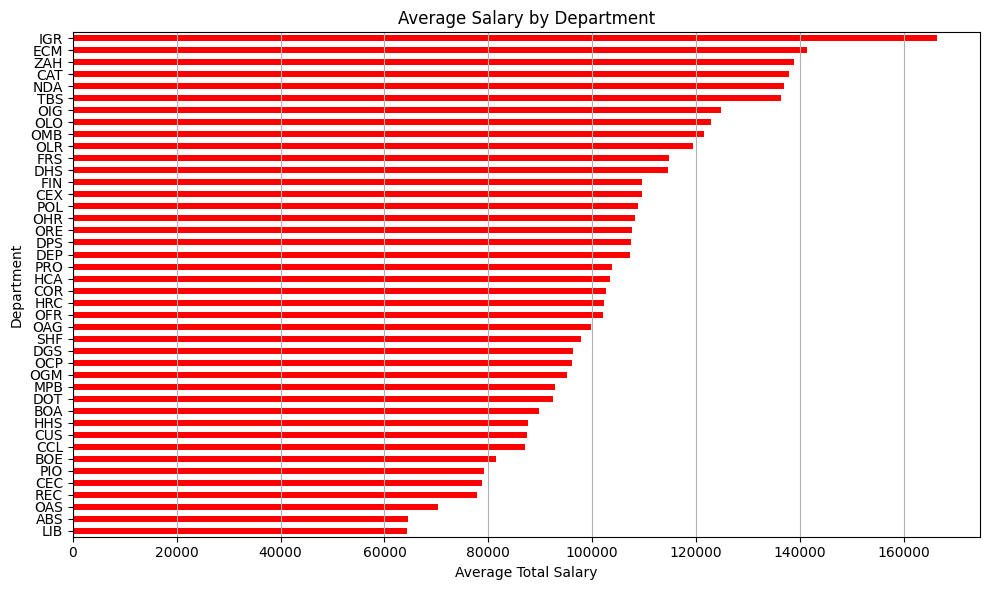

In [26]:
# Calculate the average total salary by department.
avg_salary_by_department = SectionA_clean1.groupby('Department')['Total_Salary'].median().sort_values()

# Plot a a bar chart to show the different departments based on the average pay.
plt.figure(figsize=(10, 6))
avg_salary_by_department.plot(kind='barh', color='red')
plt.title('Average Salary by Department')
plt.xlabel('Average Total Salary')
plt.ylabel('Department')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

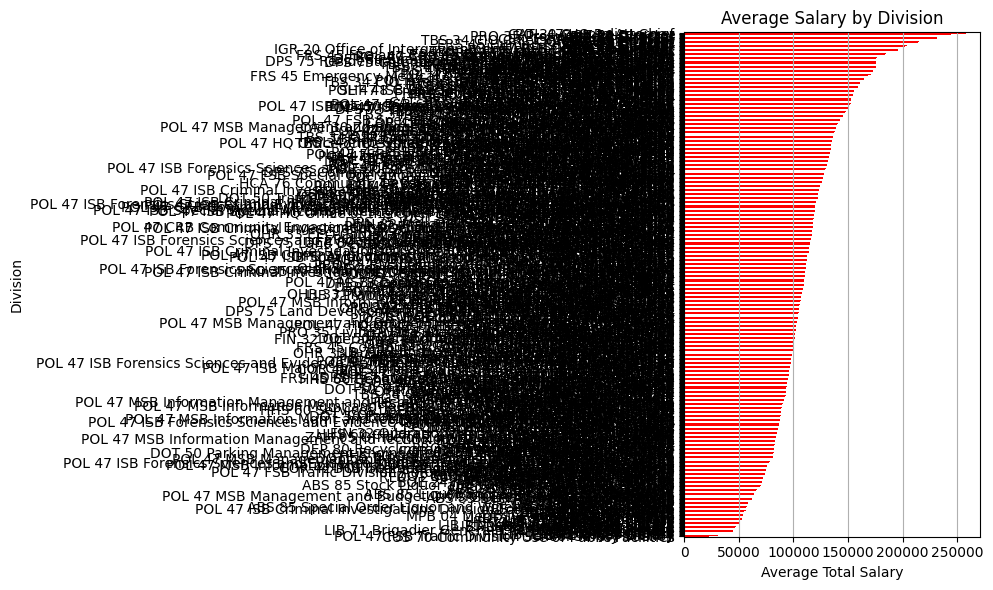

In [28]:
# Calculate the average total salary by division.
avg_salary_by_division = SectionA_clean1.groupby('Division')['Total_Salary'].median().sort_values()

# Plot a bar chart to show the different departments based on the average pay.
plt.figure(figsize=(10, 6))
avg_salary_by_division.plot(kind='barh', color='red')
plt.title('Average Salary by Division')
plt.xlabel('Average Total Salary')
plt.ylabel('Division')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

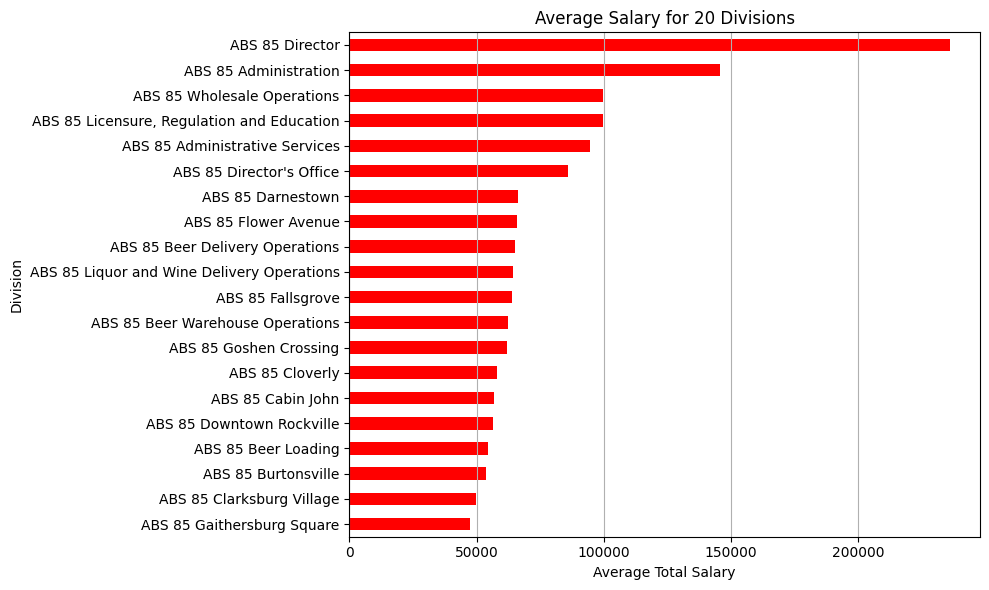

In [30]:
#The above visual is tough to see, let's sample the data
# Select 20 unique Divisions
selected_divisions = SectionA_clean1['Division'].unique()[:20]

# Filter the data to include only the selected grades
filtered_data2 = SectionA_clean1[SectionA_clean1['Division'].isin(selected_divisions)]
# Calculate the average total salary by division.
avg_salary_by_division = filtered_data.groupby('Division')['Total_Salary'].median().sort_values()

# Plot a bar chart to show the different departments based on the average pay.
plt.figure(figsize=(10, 6))
avg_salary_by_division.plot(kind='barh', color='red')
plt.title('Average Salary for 20 Divisions')
plt.xlabel('Average Total Salary')
plt.ylabel('Division')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

         Result Explanation:
- There's definitely a pay disparity in the different departments and divisions
- For instance, across all the departments, the "IGR" department gets the highest total salary >160,000, whereas "LIB" gets the lowest at a little over 60,000.
- A similar scenario is seen for 20 sampled divisions, "ABS 85 Director" receives the highest total salary. 